<a href="https://colab.research.google.com/github/anuragal/deep-learning/blob/master/S10/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.resnet18 import ResNet18

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

## Run the Model

In [0]:
%matplotlib inline

In [3]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min')

# training the dataset and then running test
dm = DataModel(img_data, criterion, optimizer, scheduler, num_of_epochs = 50, cal_misclassified = True)
dm.run_model(model, device)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4005717039108276 Batch_id=390 Accuracy=41.43: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 5223/10000 (52.23%)

EPOCH: 2


Loss=1.0682578086853027 Batch_id=390 Accuracy=55.99: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 5962/10000 (59.62%)

EPOCH: 3


Loss=0.9539996981620789 Batch_id=390 Accuracy=63.41: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 6337/10000 (63.37%)

EPOCH: 4


Loss=0.7475757002830505 Batch_id=390 Accuracy=67.80: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 7098/10000 (70.98%)

EPOCH: 5


Loss=0.785336434841156 Batch_id=390 Accuracy=71.37: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 7163/10000 (71.63%)

EPOCH: 6


Loss=0.6778990626335144 Batch_id=390 Accuracy=74.41: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 7483/10000 (74.83%)

EPOCH: 7


Loss=0.7157461643218994 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 7440/10000 (74.40%)

EPOCH: 8


Loss=0.6831861138343811 Batch_id=390 Accuracy=78.42: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7689/10000 (76.89%)

EPOCH: 9


Loss=0.6756784915924072 Batch_id=390 Accuracy=79.76: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7908/10000 (79.08%)

EPOCH: 10


Loss=0.6443589925765991 Batch_id=390 Accuracy=81.14: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7944/10000 (79.44%)

EPOCH: 11


Loss=0.4798799455165863 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8186/10000 (81.86%)

EPOCH: 12


Loss=0.5179744362831116 Batch_id=390 Accuracy=83.19: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7962/10000 (79.62%)

EPOCH: 13


Loss=0.45861148834228516 Batch_id=390 Accuracy=84.29: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8235/10000 (82.35%)

EPOCH: 14


Loss=0.28686049580574036 Batch_id=390 Accuracy=85.05: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8254/10000 (82.54%)

EPOCH: 15


Loss=0.36108940839767456 Batch_id=390 Accuracy=86.26: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8128/10000 (81.28%)

EPOCH: 16


Loss=0.4389389157295227 Batch_id=390 Accuracy=86.95: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8328/10000 (83.28%)

EPOCH: 17


Loss=0.3102772533893585 Batch_id=390 Accuracy=87.48: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8253/10000 (82.53%)

EPOCH: 18


Loss=0.3312745988368988 Batch_id=390 Accuracy=88.21: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8155/10000 (81.55%)

EPOCH: 19


Loss=0.3483119308948517 Batch_id=390 Accuracy=88.56: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8427/10000 (84.27%)

EPOCH: 20


Loss=0.30703219771385193 Batch_id=390 Accuracy=89.43: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8386/10000 (83.86%)

EPOCH: 21


Loss=0.25482863187789917 Batch_id=390 Accuracy=89.92: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8435/10000 (84.35%)

EPOCH: 22


Loss=0.48920807242393494 Batch_id=390 Accuracy=90.31: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8453/10000 (84.53%)

EPOCH: 23


Loss=0.24873653054237366 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8480/10000 (84.80%)

EPOCH: 24


Loss=0.24424472451210022 Batch_id=390 Accuracy=91.30: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8217/10000 (82.17%)

EPOCH: 25


Loss=0.3512367606163025 Batch_id=390 Accuracy=91.30: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8280/10000 (82.80%)

EPOCH: 26


Loss=0.2751287817955017 Batch_id=390 Accuracy=91.95: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8478/10000 (84.78%)

EPOCH: 27


Loss=0.18890878558158875 Batch_id=390 Accuracy=92.18: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8587/10000 (85.87%)

EPOCH: 28


Loss=0.3806997537612915 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8515/10000 (85.15%)

EPOCH: 29


Loss=0.10442237555980682 Batch_id=390 Accuracy=92.99: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8570/10000 (85.70%)

EPOCH: 30


Loss=0.187853142619133 Batch_id=390 Accuracy=93.22: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8496/10000 (84.96%)

EPOCH: 31


Loss=0.19039492309093475 Batch_id=390 Accuracy=93.42: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8588/10000 (85.88%)

EPOCH: 32


Loss=0.19019362330436707 Batch_id=390 Accuracy=93.81: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8575/10000 (85.75%)

EPOCH: 33


Loss=0.2735913395881653 Batch_id=390 Accuracy=94.11: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8593/10000 (85.93%)

EPOCH: 34


Loss=0.27102750539779663 Batch_id=390 Accuracy=94.04: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8608/10000 (86.08%)

EPOCH: 35


Loss=0.23685283958911896 Batch_id=390 Accuracy=94.20: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8593/10000 (85.93%)

EPOCH: 36


Loss=0.13056956231594086 Batch_id=390 Accuracy=94.65: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8512/10000 (85.12%)

EPOCH: 37


Loss=0.16211837530136108 Batch_id=390 Accuracy=94.72: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8654/10000 (86.54%)

EPOCH: 38


Loss=0.22043192386627197 Batch_id=390 Accuracy=94.56: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8644/10000 (86.44%)

EPOCH: 39


Loss=0.3704744577407837 Batch_id=390 Accuracy=94.89: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8691/10000 (86.91%)

EPOCH: 40


Loss=0.2931812107563019 Batch_id=390 Accuracy=95.16: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8681/10000 (86.81%)

EPOCH: 41


Loss=0.1414937525987625 Batch_id=390 Accuracy=96.59: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8878/10000 (88.78%)

EPOCH: 42


Loss=0.0658997967839241 Batch_id=390 Accuracy=97.06: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8888/10000 (88.88%)

EPOCH: 43


Loss=0.11348259449005127 Batch_id=390 Accuracy=97.23: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8888/10000 (88.88%)

EPOCH: 44


Loss=0.09069211781024933 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8896/10000 (88.96%)

EPOCH: 45


Loss=0.08130988478660583 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8885/10000 (88.85%)

EPOCH: 46


Loss=0.027501707896590233 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8887/10000 (88.87%)

EPOCH: 47


Loss=0.12224040180444717 Batch_id=390 Accuracy=97.62: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8869/10000 (88.69%)

EPOCH: 48


Loss=0.0704941600561142 Batch_id=390 Accuracy=97.65: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8894/10000 (88.94%)

EPOCH: 49


Loss=0.06514062732458115 Batch_id=390 Accuracy=97.68: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8894/10000 (88.94%)

EPOCH: 50


Loss=0.04677150398492813 Batch_id=390 Accuracy=97.85: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]



Test set: Average loss: 0.0037, Accuracy: 8898/10000 (88.98%)



## Plotting Validation Accuracy

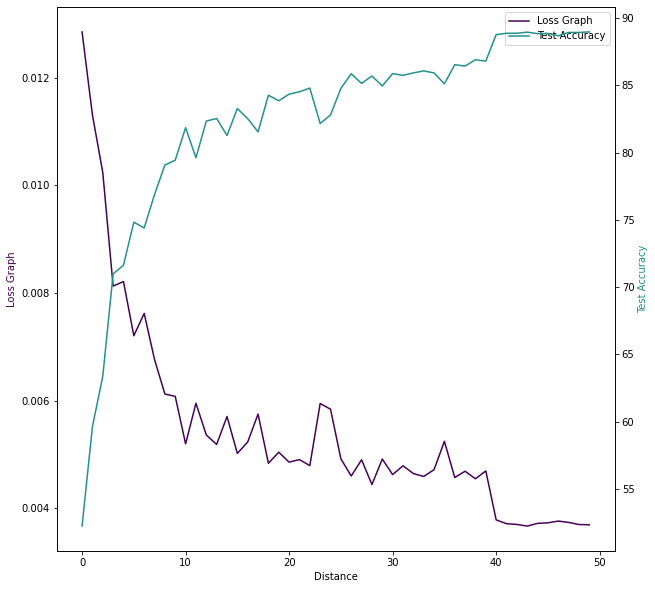

In [4]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

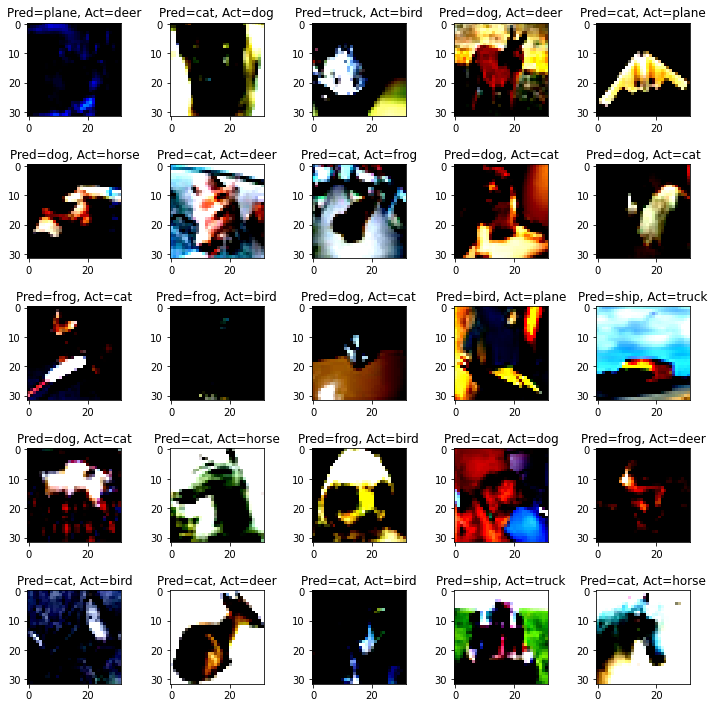

In [5]:
dm.plot_misclassified()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

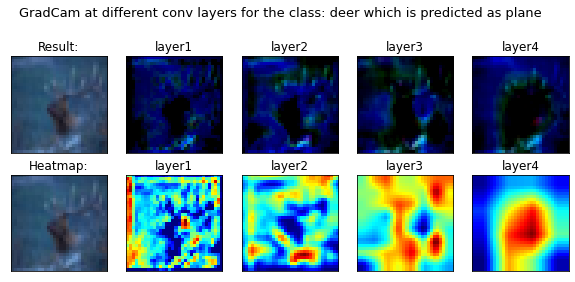

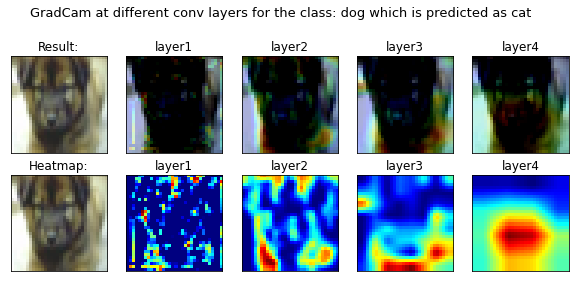

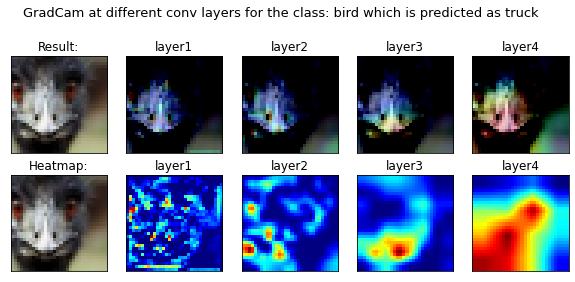

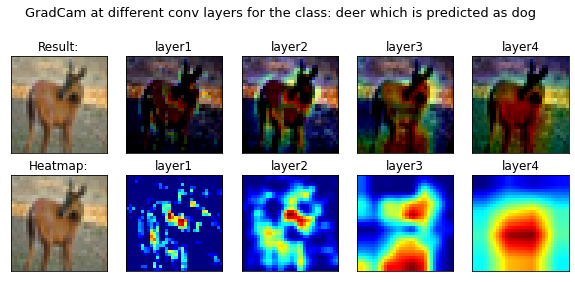

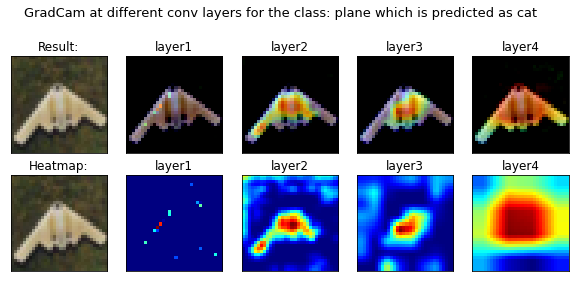

In [6]:
dm.plot_GRADcam(["layer1","layer2","layer3","layer4"])

## Plot LR FInder

  pip install torch-lr-finder -v --global-option="amp"



Learning rate search finished. See the graph with {finder_name}.plot()


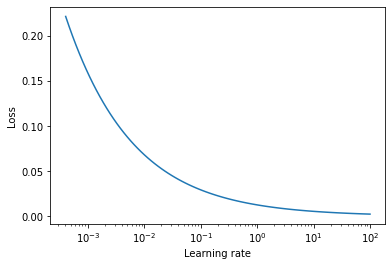

In [7]:
from lrfinder import LRFinder

lr_finder = LRFinder(model, optimizer, criterion, device)
lr_finder.range_test(img_data.trainloader, val_loader=img_data.testloader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot(skip_end=0)
